### Modelo De impulso Nervioso de Hodgkin-Huxley 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns
from numba import jit
import scipy
from scipy.fftpack import rfft, fftfreq
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set()
sns.set_context("poster")

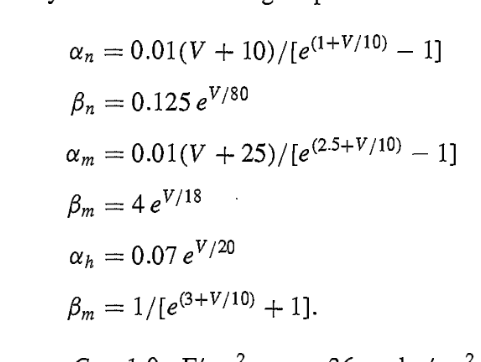

In [ ]:
#Gates
Vr=-70
def alfn(V):
  "alpha_n"
  return 0.01*(10-(V-Vr))/(np.exp(1-(V-Vr)/10)-1)
def betn(V):
  "betha_n"
  return 0.125*np.exp(-(V-Vr)/80)
def alfm(V):
    "alpha_m"
    return 0.1*(-(V-Vr)+25)/(np.exp(2.5-(V-Vr)/10)-1)
def betm(V):
    "betha_m"
    return 4*np.exp(-(V-Vr)/18)
def alfh(V):
    "alpha_h"
    return 0.07*np.exp(-(V-Vr)/20)
def beth(V):
  "betha_h"
  return 1/(np.exp(3-(V-Vr)/10)+1)
#corriente base
def Iext(t):
  return 0
#equation system
def fderiv(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
    return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk)-gNa*np.power(y[2],3)*y[3]*(y[0]-VNa)-gL*(y[0]-VL)+Iext(t)),
                     (alfn(y[0])*(1-y[1])-betn(y[0])*y[1]),
                     (alfm(y[0])*(1-y[2])-betm(y[0])*y[2]),
                     (alfh(y[0])*(1-y[3])-beth(y[0])*y[3])])

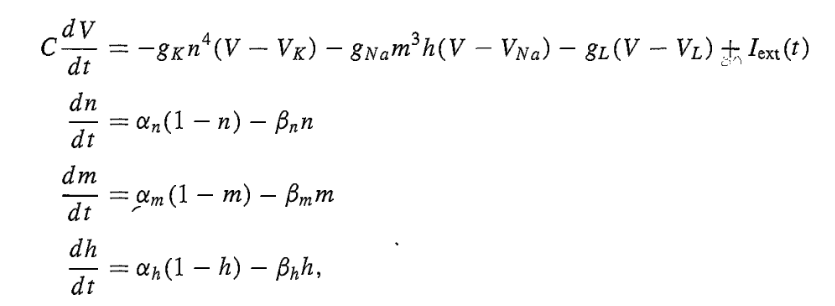

In [ ]:
#Steady State
#a)
v = np.linspace(-100,100,200)

def graficar(Vr = -69):
    def alfn(V):
        "alpha_n"
        return 0.01*(10-(V-Vr))/(np.exp(1-(V-Vr)/10)-1)
    def betn(V):
        "betha_n"
        return 0.125*np.exp(-(V-Vr)/80)
    def alfm(V):
        "alpha_m"
        return 0.1*(-(V-Vr)+25)/(np.exp(2.5-(V-Vr)/10)-1)
    def betm(V):
        "betha_m"
        return 4*np.exp(-(V-Vr)/18)
    def alfh(V):
        "alpha_h"
        return 0.07*np.exp(-(V-Vr)/20)
    def beth(V):
        "betha_h"
        return 1/(np.exp(3-(V-Vr)/10)+1)

    n= alfn(v)/(alfn(v)+ betn(v))
    m= alfm(v)/(alfm(v)+ betm(v))
    h= alfh(v)/(alfh(v)+ beth(v))


    plt.figure(figsize=(14,6))
    plt.plot(v,n ,label=r"n")
    plt.plot(v,m ,label=r"m")
    plt.plot(v,h ,label=r"h")
    plt.xlabel(r"$V$[mV]")
    plt.ylabel(r"Proportion Open Gates")
    plt.title("n(V), m(V) y h(V)",fontweight="bold")
    plt.legend()
    


interact(graficar, Vr=(-100,60))

interactive(children=(IntSlider(value=-69, description='Vr', max=60, min=-100), Output()), _dom_classes=('widg…

<function __main__.graficar(Vr=-69)>

In [ ]:
                      #Caso General 
# b)
#Corriente Externa. Ejemplo

def general(iex = 5.4):
  def Iext(t,iex):
    "funcion arbritraria de corrientes externas que afecten el impulso nervioso"
    if (t>=0 and t<1) or t>2:
      return 0
    else:
      return iex
  x=np.linspace(0,20,50)
  Iex=[]
  for i in x:
    Iex.append(Iext(i,iex))

  #Parametros Inicicales
  V0=-70
  n0=0.315
  m0=0.042
  h0=0.608
  T0=0
  TF=40
  DT=0.1

  #Resolucion de las ecuadiones acopladas
  #y[0]=V, y[1]=n, y[2]=m, y[3]=h
  def fderiv(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
    return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + Iext(t,iex)),
                    (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                    (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                    (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])
  sol = solve_ivp(fderiv, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))

  fig,ax = plt.subplots(3,1,figsize=(14,33))

  ax[0].plot(x,Iex)
  ax[0].set_xlabel("Tiempo [ms]")
  ax[0].set_ylabel("Corriente Externa [μA]")
  ax[0].set_title("Corriente Externa Inducida",fontsize=30,fontweight="bold")

  ax[1].plot(sol.t, sol.y[1], label=r"n")
  ax[1].plot(sol.t, sol.y[2], label=r"m")
  ax[1].plot(sol.t, sol.y[3], label=r"h")
  ax[1].set_xlabel(r"$t$[ms]")
  ax[1].set_ylabel(r"Proportion of Open Gates")
  ax[1].set_title("Caso No Steady-State",fontsize=30,fontweight="bold")
  ax[1].legend()

  ax[2].plot(sol.t, sol.y[0], label=f"Con Pulso de Corriente = {iex} [μA]")
  ax[2].set_xlabel("Tiempo [ms]")
  ax[2].set_ylabel("V[mV]")
  ax[2].set_title("Potencial de la membrana",fontsize=30,fontweight="bold")
  ax[2].legend()


interact(general, iex=(0,6,0.2))

interactive(children=(FloatSlider(value=5.4, description='iex', max=6.0, step=0.2), Output()), _dom_classes=('…

<function __main__.general(iex=5.4)>

In [ ]:
#Punto c
def grapher(c=5):
  def Iext1(t, c):
    "funcion arbritraria de corrientes externas que afecten el impulso nervioso"
    if (t>=0 and t<1) or t>2:
      return 0
    else:
      return c
  
  V0=-70
  n0=0.315
  m0=0.042
  h0=0.608
  T0=0
  TF=40
  DT=0.1


  def fderiv1(t, y, C, gk, Vk, gNa, VNa, gL, VL, c): 
    return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + Iext1(t, c)),
                    (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                    (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                    (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])


  fig, ax = plt.subplots(figsize=(14,8))
  d = c-0.2
  e = d-0.2
  sol1 = solve_ivp(fderiv1, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59, c))
  sol2 = solve_ivp(fderiv1, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59, d))
  sol3 = solve_ivp(fderiv1, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59, e))
  ax.plot(sol1.t, sol1.y[0], label=f"I = {np.round(c,decimals=2)} [μA]")
  ax.plot(sol2.t, sol2.y[0], label=f"I = {np.round(d,decimals=2)} [μA]")
  ax.plot(sol3.t, sol3.y[0], label=f"I = {np.round(e,decimals=2)}[μA]")
  ax.set_ylabel(f"$V\:[mV]$")
  ax.set_xlabel(f"$t\:[ms]$")
  ax.legend()

interact(grapher, c= (-2,10,0.1))
# COMIENZAN A HABER PICOS DESDE I_EXT = 5.4 ###

interactive(children=(FloatSlider(value=5.0, description='c', max=10.0, min=-2.0), Output()), _dom_classes=('w…

<function __main__.grapher(c=5)>

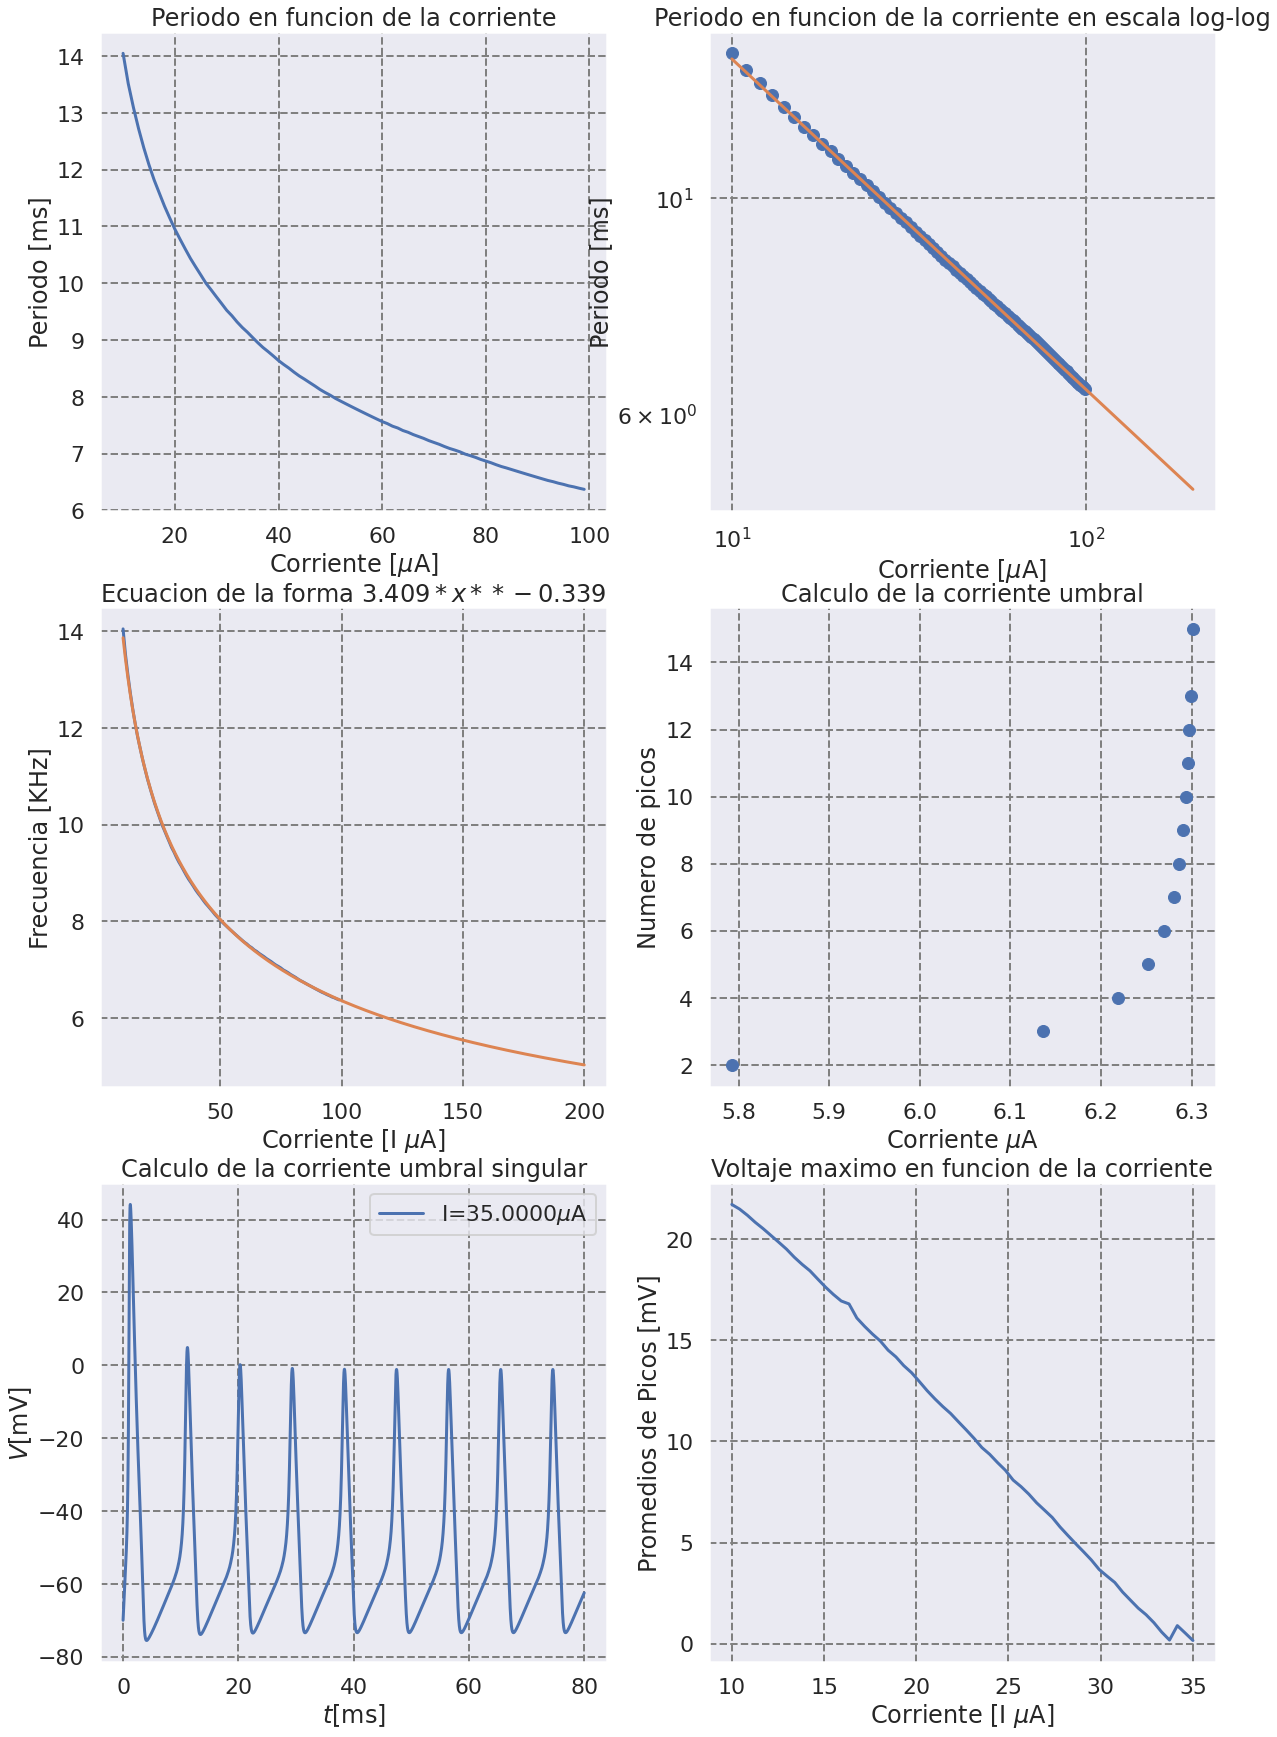

In [ ]:
#D
#Falta terminarlo  Wiclhes** 
def puntod():
  "Constantes usadas (el intervalo de tiempo puede variar a conveniencia)"
  V0=-70
  n0=0.315
  m0=0.042
  h0=0.608
  T0=0
  TF=40
  DT=0.1

  def fderiv(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
    return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk)-gNa*np.power(y[2],3)*y[3]*(y[0]-VNa)-gL*(y[0]-VL)+Iext(t)),
                     (alfn(y[0])*(1-y[1])-betn(y[0])*y[1]),
                     (alfm(y[0])*(1-y[2])-betm(y[0])*y[2]),
                     (alfh(y[0])*(1-y[3])-beth(y[0])*y[3])])

  #funcion que calcula los maximos de una funcion y los retorna junto con sus ubicaciones 
  def nmaximos(x,y,aumento,grafica):
    '''Retorna ubicaciones y maximos'''
    maximos=[]
    ubicaciones=[]
    indexmax=np.where(np.abs(y) == np.max(np.abs(y))) #donde esta el maximo de una funcion
    j=0
    maxtemporal=np.max(y[int(j):])+1
    while True:
      
      if any(y[int(j):]) and j<len(y) : 
        maxtemporal=np.max(y[int(j):])
        indexmax=np.where(np.abs(y) == maxtemporal)[0]#donde esta el maximo temporal
        if len(indexmax)>0 and  len(indexmax)!=2 :
          ubicaciones.append(x[indexmax[0]])
          maximos.append(maxtemporal)
          j=indexmax+aumento
        j+=aumento
      else: break

    if grafica==1:
      #Grafica
      fig, ax = plt.subplots(figsize=(8,8))
      ax.plot(x,y,".-")
      ax.plot(ubicaciones,maximos,".")

    return ubicaciones, maximos
  
  #funcion que calcula la transformada de Fourier y devulve frecuencia y periodo

  def Fourier(x,y,grafica,picos=2):
    dt = x[1] - x[0]
    yf = scipy.fftpack.rfft(y-np.mean(y))
    xf = scipy.fftpack.fftfreq(yf.size,dt)
    yf=np.abs(yf)
    copia=np.sort(yf)[::-1]
    ubi=np.ones(3)
    maxi=np.ones(3)
    for i in range(3):
      lugar=np.where(copia[i]==yf)[0]
      ubi[i]=xf[lugar]
      maxi[i]=yf[int(lugar)]

    indexmax=np.where(np.abs(yf) == np.max(np.abs(yf)))
    
    if grafica==1:
      #graficas
      fig, ax = plt.subplots(1,2,figsize=(18,8))
      ax[0].plot(x,y)
      ax[0].grid(axis = 'both', color = 'gray', linestyle = 'dashed')

      ax[1].plot(xf[:x.size//2], yf[:yf.size//2],".-")
      ax[1].plot(ubi,maxi,"o")
      ax[1].set_xlim([0, 1])
      ax[1].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
    ubi=np.sort(ubi)
    return ubi[0],2/ubi[0]
  
  #Funcion que calcula la derivada central
  def central(f, x, h=10**(-5)):
    if type(f)==type(np.array([])):
      df=np.ones(f.size)
      dt=x[1]-x[0]
      df[1:f.size-1]=(-f[:f.size-2]+f[2:])/(2*dt)
      return df[1:f.size-1]
    
    return (f(x+h/2)-f(x-h/2))/h
  
  #funcion que calcula el valor promedio de los picos de una funcion
  def prompicos(x,y,grafica):
    rango=np.where(np.isclose(df, 0, rtol=0.3, atol=0.3))
    picos=[]
    npicos=[]
    for i in rango[0]:
      if sol.y[0][i]>0:
        picos.append(sol.y[0][i])
        npicos.append(sol.t[i])


    if grafica==1:
      fig,ax=plt.subplots(1,2,figsize=(18,8))
      ax[0].plot(sol.t[1:-1],df,".")
      ax[0].plot(sol.t,sol.y[0])

      ax[0].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
      ax[1].plot(sol.t,sol.y[0])
      ax[1].plot(npicos,picos,".")
      ax[1].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
      ax[1].plot(npicos,np.ones(len(npicos))*np.mean(picos[3:]))
    
    return np.mean(picos[3:])

  #Corriente umbral
  TF=400
  DT=0.1
  j=2
  ii=5.78
  npicos=[]
  corrientes=[]
  while j<15:
    for i in np.linspace(ii,6.4,100):
      def Iext(t):
          return i
      sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0=[V0, n0, m0, h0 ],
                      args=(1, 24.34, -82, 70.7, 55, 0.3, -59))
      
      picos=nmaximos(sol.t,sol.y[0],80,0)
      if len(picos[1])>=j:
        npicos.append(i)
        corrientes.append(len(picos[1]))
        ii=i
        j=len(picos[1])+1
        break

  #determinacion de Frecuencia y periodo en funcion de la corriente y su realcion funcional
  TF=8000
  DT=0.1
  frec=[]
  peri=[]
  
  rango=range(10,100)
  for i in rango:
    def Iext(t):
      return i
      print(i)
    sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0=[V0, n0, m0, h0 ],
                    args=(1, 24.34, -82, 70.7, 55, 0.3, -59))
    Frecuencia,Periodo=Fourier(sol.t,sol.y[0],0)
    frec.append(Frecuencia)
    peri.append(Periodo)
  
  #relacion funcional 
  x = np.log(rango)
  y = np.log(peri)
  res = stats.linregress(x, y)
  ejex=np.linspace(10,200,400)
  ejey=np.exp(res.intercept)*np.power(ejex,res.slope)
  
  #corriente umbral para un unico pico significativo (mayor que 0)
  pico=-1
  TF=40
  DT=0.01
  for i in np.linspace(1,1.35,500):
    def Iext(t):return i
    sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0=[V0, n0, m0, h0 ],
                  args=(1, 24.34, -82, 70.7, 55, 0.3, -59))
    pico=np.max(sol.y[0])

    if pico>0:
      TF=90
      sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0=[V0, n0, m0, h0 ],
                    args=(1, 24.34, -82, 70.7, 55, 0.3, -59))
      break
        
    i-=0.1
  
  #cota superior de los picos en funcion de la corriente
  promA=[]
  TF=80
  DT=0.001
  for i in np.linspace(10,35,60):
    def Iext(t):
      return i
    sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0=[V0, n0, m0, h0 ],
                  args=(1, 24.34, -82, 70.7, 55, 0.3, -59))
    y=sol.y[0]
    df=central(y, sol.t, h=10**(-5))
    promA.append(prompicos(sol.t,df,0))


  #graficas
  fig,ax=plt.subplots(3,2,figsize=(20,30))

  '''ax[0][0].plot(rango,frec)
  ax[0][0].set_xlabel(f'Corriente [$\mu$A]')
  ax[0][0].set_ylabel(f'Frecuencia [KHz]') 
  ax[0][0].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
  ax[0][0].set_title(f'Frecuencia en funcion de la corriente')'''

  ax[0][0].plot(rango,peri)
  ax[0][0].set_xlabel(f'Corriente [$\mu$A]')
  ax[0][0].set_ylabel(f'Periodo [ms]') 
  ax[0][0].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
  ax[0][0].set_title(f'Periodo en funcion de la corriente')

  ax[0][1].plot(rango,peri,"o")
  ax[0][1].plot(ejex,ejey)
  ax[0][1].set_xlabel(f'Corriente [$\mu$A]')
  ax[0][1].set_ylabel(f'Periodo [ms]') 
  ax[0][1].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
  ax[0][1].set_xscale('log')
  ax[0][1].set_yscale('log')
  ax[0][1].set_title(f'Periodo en funcion de la corriente en escala log-log')

  ax[1][0].plot(rango,peri)
  ax[1][0].plot(ejex,ejey,label=f"R-squared: {res.rvalue**2:.6f}")
  ax[1][0].set_xlabel(f'Corriente [I $\mu$A]')
  ax[1][0].set_ylabel(f'Frecuencia [KHz]') 
  ax[1][0].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
  ax[1][0].set_title(f'Ecuacion de la forma ${res.intercept:.3f}*x**{res.slope:.3f}$')

  ax[1][1].plot(npicos,corrientes,"o")
  ax[1][1].set_xlabel(f"Corriente $\mu$A")
  ax[1][1].set_ylabel(f"Numero de picos")
  ax[1][1].set_title('Calculo de la corriente umbral')
  ax[1][1].grid(axis = 'both', color = 'gray', linestyle = 'dashed')

  ax[2][0].plot(sol.t, sol.y[0], label=f"I={i:.4f}$\mu$A")
  ax[2][0].set_ylabel(r"$V$[mV]")
  ax[2][0].set_xlabel(r"$t$[ms]")
  ax[2][0].set_title('Calculo de la corriente umbral singular')
  ax[2][0].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
  ax[2][0].legend()

  ax[2][1].plot(np.linspace(10,35,60),promA)
  ax[2][1].set_xlabel(f'Corriente [I $\mu$A]')
  ax[2][1].set_ylabel(f'Promedios de Picos [mV]') 
  ax[2][1].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
  ax[2][1].set_title('Voltaje maximo en funcion de la corriente')

puntod()

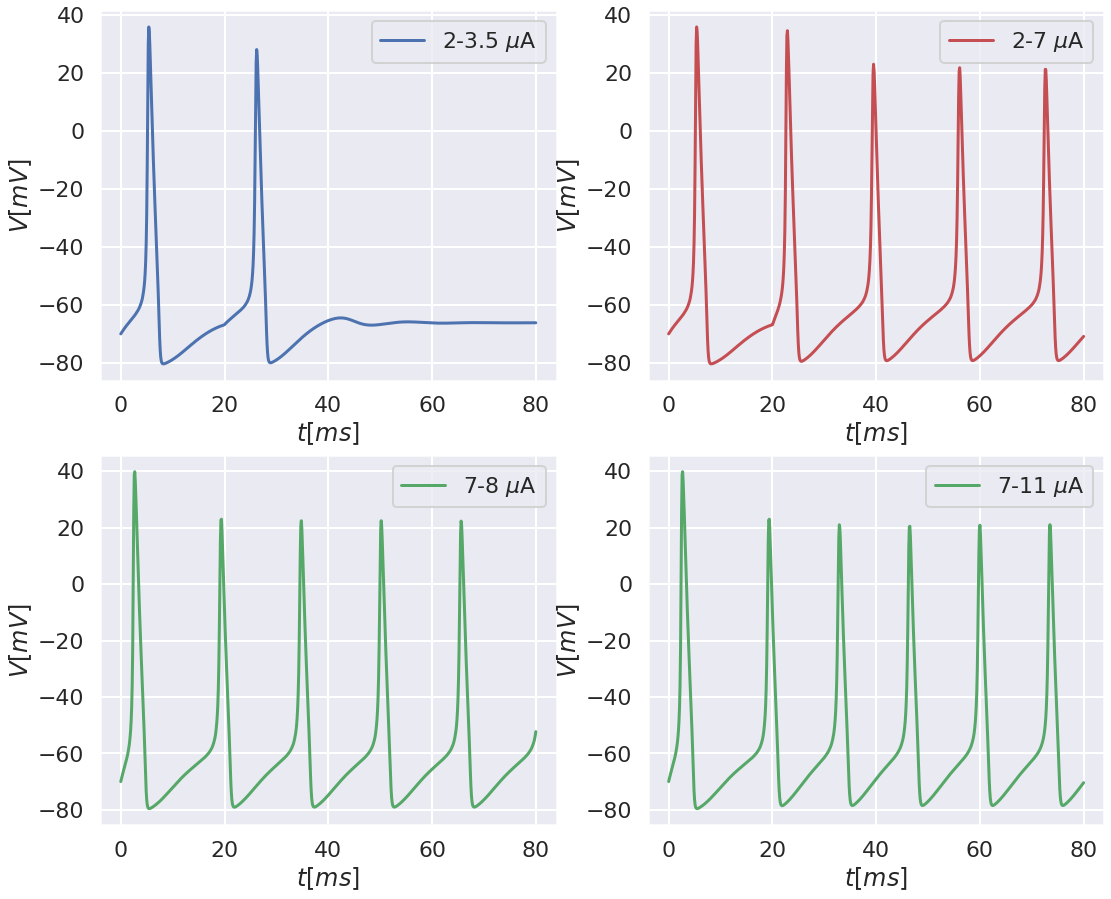

In [ ]:
# Punto E, saltos de Corriente
def d1Iext(t):
  if  t<20:
    return 2
  else:
    return 3.5
def d2Iext(t):
  if  t<20:
    return 2
  else:
    return 7
def d3Iext(t):
  if  t<20:
    return 7
  else:
    return 8
def d4Iext(t):
  if  t<20:
    return 7
  else:
    return 11
T0=0
TF=80
V0=-70
n0=0.315
m0=0.042
h0=0.608
DT=0.1


def fderivdelta1(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + d1Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])
def fderivdelta2(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + d2Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])
def fderivdelta3(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + d3Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])  
def fderivdelta4(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + d4Iext(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(18,15))
figsize=(10,8)
sol1 = solve_ivp(fderivdelta1, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))
sol2 = solve_ivp(fderivdelta2, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))
sol3 = solve_ivp(fderivdelta3, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))
sol4 = solve_ivp(fderivdelta4, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))
ax1.plot(sol1.t, sol1.y[0],"b",label=r"2-3.5 $\mu$A")
ax2.plot(sol2.t, sol2.y[0],"r",label=r"2-7 $\mu$A")
ax3.plot(sol3.t, sol3.y[0],"g",label=r"7-8 $\mu$A")
ax4.plot(sol4.t, sol4.y[0],"g",label=r"7-11 $\mu$A")
ax1.set_ylabel("$V[mV]$")
ax1.set_xlabel("$t[ms]$")
ax2.set_ylabel("$V[mV]$")
ax2.set_xlabel("$t[ms]$")
ax3.set_ylabel("$V[mV]$")
ax3.set_xlabel("$t[ms]$")
ax4.set_ylabel("$V[mV]$")
ax4.set_xlabel("$t[ms]$")
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

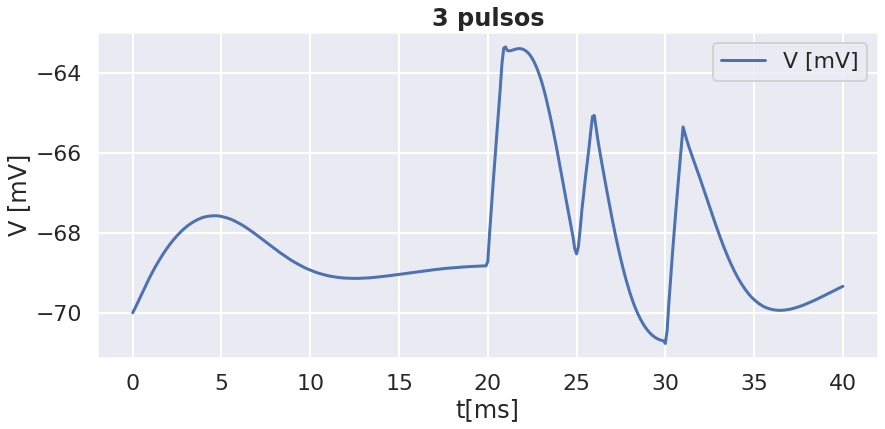

In [ ]:
#PUNTO F - pulsos
def Iextf(t):
  "funcion de pulsos de corriente"
  if (t>=20 and t<=21) or (t>=25 and t<=26) or (t>=30 and t<=31):
    return 7
  else:
    return 0



def fderiv(t, y, C, gk, Vk, gNa, VNa, gL, VL ): 
  return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk) - gNa*np.power(y[2],3)*y[3]*(y[0]-VNa) - gL*(y[0]-VL) + Iextf(t)),
                  (alfn(y[0])*(1-y[1]) - betn(y[0])*y[1]),
                  (alfm(y[0])*(1-y[2]) - betm(y[0])*y[2]),
                  (alfh(y[0])*(1-y[3]) - beth(y[0])*y[3])])
  
V0=-70
n0=0.315
m0=0.042
h0=0.608
T0=0
TF=40
DT=0.1

sol = solve_ivp(fderiv, t_span = [T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0 = [V0, n0, m0, h0], args = (1, 24.34, -82, 70.7, 55, 0.3, -59))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(sol.t, sol.y[0], label=r"V [mV]")
plt.xlabel('t[ms]')
plt.ylabel('V [mV]')
plt.title("3 pulsos",fontweight="bold")
plt.legend()